# Logistic Regression: Scratch vs scikit-learn

## Necessary Modules

In [21]:
from sklearn.linear_model import LogisticRegression              # To perform logistic regression
from sklearn.model_selection import train_test_split            # To split data into training data and test data
from sklearn.preprocessing import StandardScaler               # To standardize/normalize data
from sklearn.metrics import confusion_matrix                  # To create confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay           # To visualize our confusion matrix
from sklearn.metrics import classification_report           # To obtain accuracy,f-score,recall
import time                                                # To measure Training time              

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The dataset is loaded into the variable df

In [3]:
df = pd.read_csv('heartdisease.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Dealing with NaN

In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

**Observations** : 
- There are 105 NaN values in `education` column .We can drop the education column as it's not necessary to predict whether a person has a heart disease or not.
- There are 29 NaN values in the `cigsPerDay`column,if the person is a currentSmoker. We can remove the rows where it has NaN values.
- We will also drop the rows where NaN exist in columns `totChol`,`BMI`,`heartRate`.
- There are 53 NaN values in `BPMeds` column . We can fill the NaN values with zero.
- There are 388 NaN values in the `glucose` column.Let us replace it with the mean of the values present in that column.

In [5]:
df = df.drop(columns = 'education') # The 'education' column is dropped.

df = df[df['cigsPerDay'].notna()]  # The new df will not have the rows where 'cigsPerDay' is NaN.

# Do the same for other 3 rows
df = df[df['totChol'].notna()]
df = df[df['BMI'].notna()]
df = df[df['heartRate'].notna()]

df['BPMeds'] = df['BPMeds'].fillna(0) # The NaN values are filled with zeros.

# For the glucose column
mean = round(df['glucose'].mean())
df['glucose'] = df['glucose'].fillna(mean) # The NaN values are replaced with the mean

# Checking
df.isna().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### How do select the targets and features?

- target (y) should be a single column encoded with the binary numbers 0 & 1.

- features are:The input variables used to make predictions,one or more columns,numeric (categorical features must be encoded)

Ex : age,income,hours_studied etc

**Note**:Features should not directly leak the answer

(e.g., don’t include a column like final_grade when predicting passed).

### In our dataset

- Target is the column TenYearCHD : 
  This indicates whether a person developed Coronary Heart Disease within 10 years

  Values:
    0 = No CHD    1 = CHD

- Features are all the other columns, because they describe patient characteristics used to predict CHD.

**Note** : Exclude TenYearCHD from the features. (If this is put along with features then it leaks the answer)

## Selecting features

Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [7]:
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
# split dataset in features and target variable

feature_cols = ['male','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke',
                'prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']
                
x = df[feature_cols] # Features
y = df.TenYearCHD # Target variable

## Splitting data

The dataset should now be split into a training set and a test set.

The dataset is split using the function train_test_split(). 3 parameters are passed : features, target, and test_set size. Additionally, random_state is used to select records randomly.

In [9]:
# split x and y into training and testing sets
x_train_uns, x_test_uns, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16) # The 'uns' stands for unscaled

Here, the Dataset is broken into two parts in a ratio of **75:25**. It means 75% data will be used for model training and 25% for model testing.

## Normalize data

**What does “normalize” mean?**

In practice, people usually mean feature scaling.
The most common method is standardization:

    x(scaled) = (x-mean)/(standard deviation)
    
After this:

Each feature has mean ≈ 0

Standard deviation ≈ 1

This helps logistic regression converge faster and behave better.

**Why normalization is needed here**

Features have very different ranges:

- age: ~30–70
- sysBP: ~90–200
- totChol: ~150–300
- BMI: ~20–40

Without normalization:Large-scale features dominate the model

Optimization becomes unstable.

**Correct way to normalize (IMPORTANT)**
- Fit the scaler only on training data

- Apply the same scaler to test data

**`Never scale before train–test split.`**

You should split first, then standardize using only the training data.

**Why this matters**

Standardization (mean = 0, std = 1) uses statistics from the data.
If you standardize before splitting, information from the test set leaks into the training process , this is called *data leakage*, and it makes your model look better than it really is.

### Normalize using StandardScaler

In [10]:
# An object is created to use the StandardScaler() module
scaler = StandardScaler()

# Fit on training data only
x_train = scaler.fit_transform(x_train_uns)

# Apply to test data
x_test = scaler.transform(x_test_uns)

## Model development and prediction

### 1. Using the available module

First, import the LogisticRegression module and create a logistic regression classifier object using the `LogisticRegression()` function with random_state for reproducibility.

Then, fit the model on the train set using `fit()` and perform prediction on the test set using `predict()`. 

In [22]:
# create the object (using the default parameters)
obj1 = LogisticRegression(random_state=16)

# To measure training time...we set start time (before fitting model)
start_time = time.time()
# fit the model with data
obj1.fit(x_train, y_train)
# Make note of end time
end_time = time.time()

# To get the training time
training_time_module = end_time - start_time

# Making predictions
y_pred1 = obj1.predict(x_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [12]:
cnf_matrix1 = confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[885,   4],
       [134,  12]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. *Diagonal values* represent **accurate** predictions, while *non-diagonal* elements are **inaccurate predictions**. In the output, `885` and `12` are actual predictions, and `134` and `4` are incorrect predictions.

### Visualizing confusion matrix using Heatmap

Text(0.5, 1.0, 'Confusion Matrix - Sklearn Model')

<Figure size 800x600 with 0 Axes>

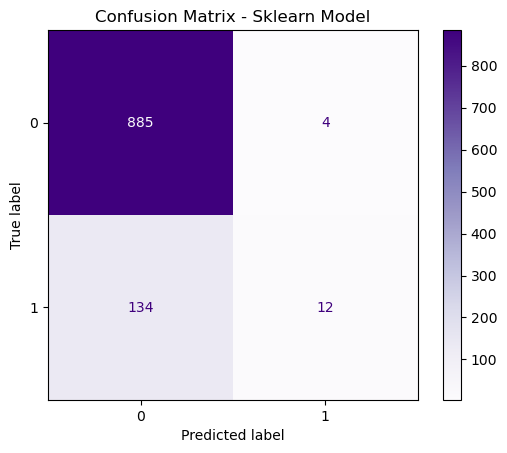

In [13]:
disp1 = ConfusionMatrixDisplay(cnf_matrix1,display_labels = ['0','1'])

plt.figure(figsize = (8,6))          # Creates a new figure with width 8 inches and height 6 inches.
                                    # Ensures the confusion matrix plot is large and readable.
disp1.plot(cmap = plt.cm.Purples)
plt.title('Confusion Matrix - Sklearn Model')     # Adds a title to the plot for clarity.


For binary logistic regression, the matrix looks like:

[[TN  FP]

 [FN  TP]]

Where:
- TN = True Negatives (class 0 predicted as 0)
- FP = False Positives (class 0 predicted as 1)
- FN = False Negatives (class 1 predicted as 0)
- TP = True Positives (class 1 predicted as 1)

**What the ConfusionMatrixDisplay object does :**

Uses cnf_matrix as the data to visualize.

Sets the class labels:

'0' → Negative class

'1' → Positive class

These labels appear on both axes of the plot:

X-axis = Predicted labels

Y-axis = True labels

**The code `disp.plot(cmap=plt.cm.Purples)`**

Plots the confusion matrix as a heatmap.

cmap=plt.cm.Purples applies a purple color gradient:

Darker color = higher count

Lighter color = lower count

Each cell shows : The count of predictions . Corresponding to TN, FP, FN, and TP.

**In short**

This code visualizes the performance of a logistic regression classifier by plotting its confusion matrix in a clean, color-coded format that makes classification errors easy to interpret.

### Confusion matrix evaluation metrics

Let's evaluate the model using `classification_report` for accuracy, precision, and recall.

In [14]:
names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred1, target_names=names))

                       precision    recall  f1-score   support

without heart disease       0.87      1.00      0.93       889
   with heart disease       0.75      0.08      0.15       146

             accuracy                           0.87      1035
            macro avg       0.81      0.54      0.54      1035
         weighted avg       0.85      0.87      0.82      1035



Well, we got a classification rate of `87%`, considered as good accuracy.

**Precision**: Precision is about being precise, i.e., how accurate the model is. In other words, when a model makes a prediction, how often it is correct. In this prediction case, when the logistic regression model predicted patients are going to suffer from heart disease, it predicted correctly `75%` of the time.

**Recall**: If there are patients who have heart disease in the test set , then the logistic regression model can identify it 8% of the time.


We observe that `889` patients have no heart disease and `146` have heart diseases.

### Observations

**Class : without heart disease (0)**

- **Precision** = 0.87
(When the model predicts no heart disease, it is correct 87% of the time.)
- **Recall** = 1.00
(The model correctly identifies almost all patients without heart disease.)
- **F1-score** = 0.93
(Strong balance between precision and recall.)
- **Support** = 889
(There are many more samples of this class in the dataset.)

`The model performs very well for patients without heart disease.`


**Class: with heart disease (1)**

- **Precision** = 0.75
(When the model predicts heart disease, it is correct 75% of the time.)
- **Recall** = 0.08
(The model detects only 8% of actual heart disease cases.)
- **F1-score** = 0.15
(Very poor overall performance for this class.)
- **Support** = 146
(Much fewer samples compared to class 0.)

`The model misses most patients who actually have heart disease.`

### 2. Using the logreg class created from Scratch

In [15]:
class logreg:

    def __init__(self,lr=0.001,n_iters=1000):   
        self.lr = lr                                                # lr = learning rate
        self.n_iters = n_iters                                     # n_iters = number pf iterations
        self.weights = None
        self.bias = None

    def fit(self,x,y):
        # init parameters
        n_samples,n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(x,self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1/n_samples) * np.dot(x.T , (y_predicted-y))         # The 'T' in x.T means transpose of the array will be return
            db = (1/n_samples) * np.sum(y_predicted-y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self,x):
        linear_model = np.dot(x,self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
        return y_predicted_cls

    def sigmoid(self,x):
        return 1/(1 + np.exp(-x))

Now the object obj2 is created to try out our scratch model!

In [23]:
obj2 = logreg(lr=0.001,n_iters=1000)

# To measure training time
start_time = time.time()
# Fit model
obj2.fit(x_train,y_train)
# Find end time
end_time = time.time()

# Calculate the training time
training_time_scratch = end_time - start_time

# Make predictions
y_pred2 = obj2.predict(x_test)

**Question : Wont I get any issue if I use the same function names (fit & predict) as in the Logisticregression module,already in python?**

**Answer :**  **NO**

- Python does not care if different classes use the same method names . What matters is which object you’re calling the method on.
- obj1 is the object created for the LogisticRegression module , already available in python.
- obj2 is the object created for the class ,  we created from scratch , logreg.

No collision.

This is called *polymorphism*
- Many ML libraries follow the same interface.

### Model Evaluation using Confusion Matrix

In [17]:
cnf_matrix2 = confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[858,  31],
       [118,  28]])

### Visualizing confusion matrix using Heatmap

Text(0.5, 1.0, 'Confusion Matrix - Scratch Model')

<Figure size 800x600 with 0 Axes>

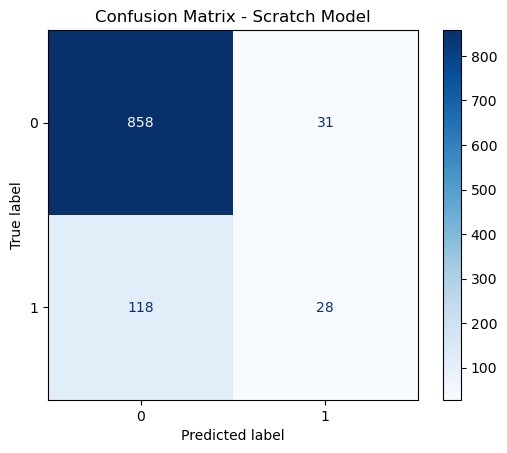

In [18]:
disp2 = ConfusionMatrixDisplay(cnf_matrix2,display_labels = ['0','1'])

plt.figure(figsize = (8,6))          # Creates a new figure with width 8 inches and height 6 inches.
                                    # Ensures the confusion matrix plot is large and readable.
disp2.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix - Scratch Model')     # Adds a title to the plot for clarity.


### Confusion matrix evaluation metrics

In [19]:
names = ['without heart disease', 'with heart disease']
print(classification_report(y_test, y_pred2, target_names=names))

                       precision    recall  f1-score   support

without heart disease       0.88      0.97      0.92       889
   with heart disease       0.47      0.19      0.27       146

             accuracy                           0.86      1035
            macro avg       0.68      0.58      0.60      1035
         weighted avg       0.82      0.86      0.83      1035



### Observations

**Accuracy** = `86%` (Pretty Good)

**Class : without heart disease (0)**

- **Precision** = 0.88
(When the model predicts no heart disease, it is correct 88% of the time.)
- **Recall** = 0.97
(The model correctly identifies almost all patients without heart disease.)
- **F1-score** = 0.92
(Strong balance between precision and recall.)
- **Support** = 889
(There are many more samples of this class in the dataset.)

`The model performs very well for patients without heart disease.`


**Class: with heart disease (1)**

- **Precision** = 0.47
(When the model predicts heart disease, it is correct 47% of the time.)
- **Recall** = 0.19
(The model detects only 19% of actual heart disease cases.)
- **F1-score** = 0.27
(Poor overall performance for this class.)
- **Support** = 146
(Much fewer samples compared to class 0.)

`The model misses most patients who actually have heart disease.`

## Results of both models

In [26]:
names = ['without heart disease', 'with heart disease']

print("The Available Module's Result")
print(classification_report(y_test, y_pred1, target_names=names))
print("Training Time :",training_time_module)

print('\n')

print("The Scratch Model's Result")
print(classification_report(y_test, y_pred2, target_names=names))
print("Training Time :",training_time_scratch)

The Available Module's Result
                       precision    recall  f1-score   support

without heart disease       0.87      1.00      0.93       889
   with heart disease       0.75      0.08      0.15       146

             accuracy                           0.87      1035
            macro avg       0.81      0.54      0.54      1035
         weighted avg       0.85      0.87      0.82      1035

Training Time : 0.05202198028564453


The Scratch Model's Result
                       precision    recall  f1-score   support

without heart disease       0.88      0.97      0.92       889
   with heart disease       0.47      0.19      0.27       146

             accuracy                           0.86      1035
            macro avg       0.68      0.58      0.60      1035
         weighted avg       0.82      0.86      0.83      1035

Training Time : 0.319232702255249


## Observations 

**Performance Differences (Metrics Comparison)**
- The scikit-learn logistic regression model slightly outperformed the from-scratch implementation across most evaluation metrics such as accuracy, precision, recall, and F1-score (especially while comparing the precison of predicting patients with heart disease). This is expected because scikit-learn uses optimized solvers (such as LBFGS or Newton methods), better numerical stability, and regularization by default.

**Training Time Comparison**
- The scikit-learn implementation trained significantly faster than the from-scratch model. This is because scikit-learn is written in optimized C/C++ under the hood and uses advanced optimization algorithms that converge in fewer iterations.
- The from-scratch implementation relied on basic gradient descent implemented in Python and NumPy, which requires more iterations and is computationally slower.

**Implementation Difficulty**
- From Scratch : Implementing logistic regression from scratch was more challenging, as it required manually coding the sigmoid function, loss function, gradient computation, and gradient descent loop. Care had to be taken to choose appropriate hyperparameters to ensure convergence.
- The scikit-learn implementation was significantly easier to use. The model could be trained and evaluated, abstracting away all mathematical and optimization details.

**Regarding the dataset**
- After training the logistic regression model on the given dataset, I observed that the precision, recall, and F1-score were high for predicting patients without heart disease, but significantly lower for predicting patients with heart disease. This imbalance in performance is likely due to the dataset containing more cases of individuals without heart disease than those with the condition. As a result, the model becomes biased toward predicting the majority class and performs better on it. 

*This highlights the importance of having a `balanced dataset` in order to train a model that can accurately predict both classes.*
